In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_data(sectors):
    html_content = requests.get(sectors).text
    soup = BeautifulSoup(html_content, "html") 
    find_table = soup.find('table', class_='wikitable sortable')
    j = 0
    full_val = []
    for link in find_table.find_all('tr'):
        j += 1
        if(j == 1):
            continue
        i = 0
        d = {}
        for ele in link.find_all('td'):
            i += 1
            if(i == 1):
                st = ele.text
                st = st[:-1]
                d['symbol'] = st
            elif(i == 4):
                d['gics_sector'] = ele.text
        
        full_val.append(d)
    df = pd.DataFrame(full_val)
    # print(df)
    df1 = pd.DataFrame()
    df1["Company"] = df["symbol"]
    df1["GICS_Sector"] = df['gics_sector']
    df1.to_csv("GICS_Sectors.csv", index=False)
    return full_val


In [3]:
def daily_graph(val):
    top_data = pd.read_csv("Day_top_dict.csv")
    bottom_data = pd.read_csv("Day_bottom_dict.csv")
    gicssectors = pd.read_csv("GICS_Sectors.csv")
    day_topdata = pd.merge(top_data,gicssectors,on="Company")
    day_bottomdata = pd.merge(bottom_data,gicssectors,on="Company")
    
    day_topdata_mean = day_topdata.groupby('GICS_Sector').count().reset_index()
    day_bottomdata_mean = day_bottomdata.groupby('GICS_Sector').count().reset_index()
    top_dict = day_topdata_mean.to_dict()
    
    top_dict1 = {}
    listt = list(top_dict.values())
    for i in range(7):
        top_dict1[listt[0][i]] = listt[1][i]
    bottom_dict = day_bottomdata_mean.to_dict()
 
    bottom_dict1 = {}
    listt1 = list(bottom_dict.values())
    for i in range(7):
        bottom_dict1[listt1[0][i]] = listt1[1][i]
   
    return top_dict1,bottom_dict1


In [4]:
def bar_graph(dp_top,dp_bottom):
    top_new = []
    bottom_new = []
    for i in dp_top.keys():
        if i not in dp_bottom.keys():
            dp_bottom[i] = 0
    for i in dp_bottom.keys():
        if i not in dp_top.keys():
            dp_top[i] = 0
    dp_top = dict(sorted(dp_top.items(), key=lambda item: item[0]))
    dp_bottom = dict(sorted(dp_bottom.items(), key=lambda item: item[0]))
#     print(dp_top)
#     print(dp_bottom)
    top_new = list(dp_top.values())
    bottom_new = list(dp_bottom.values())

    data = []
    data.append(top_new)
    data.append(bottom_new)
    barWidth = 0.25
    fig = plt.subplots(figsize=(25,9))
    br1 = np.arange(len(top_new))
    br2 = [x + barWidth for x in br1]

    plt.bar(br1, top_new, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Top 25 companies') 
    plt.bar(br2, bottom_new, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Bottom 25 companies') 
    plt.legend(labels=['Top 25', 'Bottom 25'])
    plt.xlabel('Sectors', fontweight ='bold') 
    plt.ylabel('Count', fontweight ='bold')
    plt.xticks([r + barWidth for r in range(len(top_new))], 
    list(dp_top.keys())) 

    plt.show()


In [5]:
def function(sectors):
    val = extract_data(sectors)
    dp_top, dp_bottom = daily_graph(val)
    bar_graph(dp_top,dp_bottom)


{'GICS_Sector': {0: 'Consumer Discretionary', 1: 'Consumer Staples', 2: 'Energy', 3: 'Health Care', 4: 'Industrials', 5: 'Information Technology', 6: 'Materials'}, 'Company': {0: 3, 1: 1, 2: 1, 3: 6, 4: 2, 5: 8, 6: 3}, 'Value': {0: 3, 1: 1, 2: 1, 3: 6, 4: 2, 5: 8, 6: 3}}
{'GICS_Sector': {0: 'Communication Services', 1: 'Consumer Staples', 2: 'Financials', 3: 'Health Care', 4: 'Industrials', 5: 'Real Estate', 6: 'Utilities'}, 'Company': {0: 3, 1: 1, 2: 7, 3: 2, 4: 3, 5: 2, 6: 6}, 'Value': {0: 3, 1: 1, 2: 7, 3: 2, 4: 3, 5: 2, 6: 6}}
{'Consumer Discretionary': 3, 'Consumer Staples': 1, 'Energy': 1, 'Health Care': 6, 'Industrials': 2, 'Information Technology': 8, 'Materials': 3}
--------
{'Communication Services': 3, 'Consumer Staples': 1, 'Financials': 7, 'Health Care': 2, 'Industrials': 3, 'Real Estate': 2, 'Utilities': 6}
{'Communication Services': 0, 'Consumer Discretionary': 3, 'Consumer Staples': 1, 'Energy': 1, 'Financials': 0, 'Health Care': 6, 'Industrials': 2, 'Information Techno

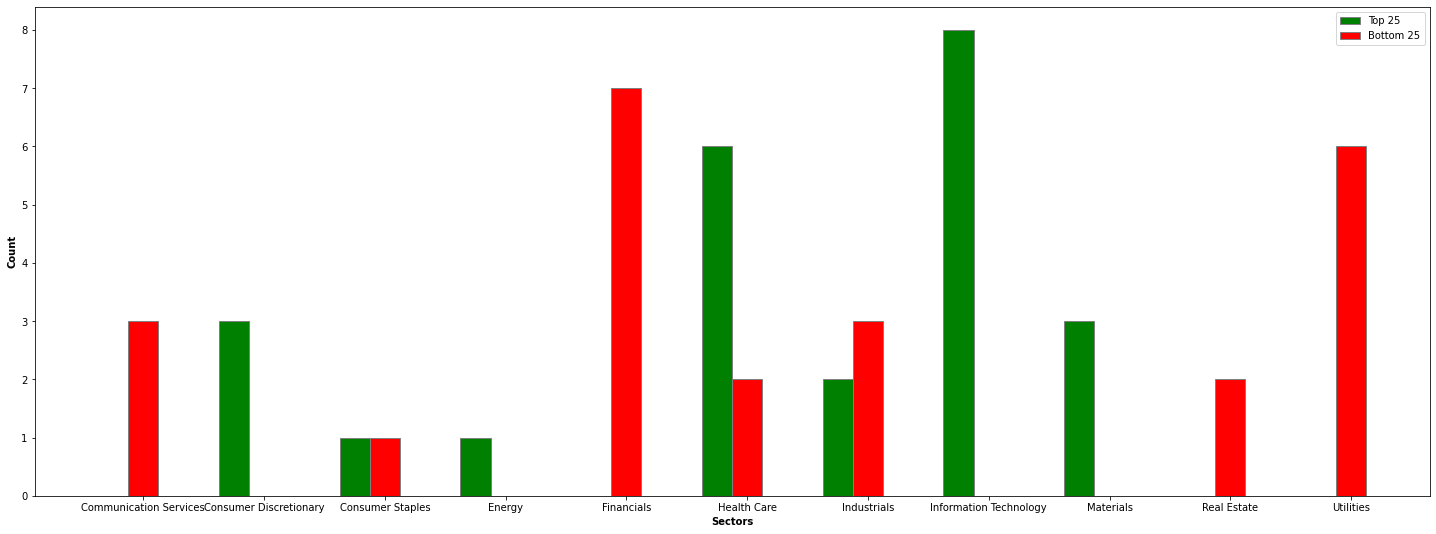

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
function(url)